In [3]:
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import sklearn
import nltk
import plotly.express as px
import matplotlib.pyplot as plt

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import RegexpStemmer
from nltk.stem import SnowballStemmer

In [37]:
vad = pd.read_csv("VAD_Dataframe.csv", index_col = 0)
data = pd.read_csv("Data.csv", index_col = 0)
# print(vad.head())
#print(data.head())
print(data.iloc[1])
test = data.iloc[1]

clean_stems    joy guide alway com when we are too attached o...
clean_tweet    joy guides always come attached need ask guide...
ijoy                                                           1
Name: 5883, dtype: object


In [38]:
#Create a function that takes in a sentence string and computes the total valence, arousal, dominance scores
#Will lso need to make sure we know if this is a joy tweet or not (keep track of ijoy)
#Return a dictionary of these total scores

#print(test['clean_stems'])
porter = PorterStemmer()
lancaster=LancasterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
regexp = RegexpStemmer('ing$|s$|e$|able$', min=4)
snowball = SnowballStemmer("english")
tokenizer = nltk.RegexpTokenizer(r"\w+")
words_st = tokenizer.tokenize(test['clean_stems'])
words = tokenizer.tokenize(test['clean_tweet'])
stems = []
for word in words:
  stems.append([word, porter.stem(word), lancaster.stem(word), regexp.stem(word), snowball.stem(word), wordnet_lemmatizer.lemmatize(word, pos='v')])


#vad_words = tokenizer.tokenize(vad['Term'])
print(words_st)
print(words)

df_stems = pd.DataFrame(stems, columns=['Word', 'Porter', 'Lancaster', 'RegExp', 'Snowball', 'Lemma'])
df_stems

['joy', 'guide', 'alway', 'com', 'when', 'we', 'are', 'too', 'attached', 'or', 'need', 'a', 'ask', 'your', 'guide', 'by', 'sonia', 'choquett', 'for', 'mor']
['joy', 'guides', 'always', 'come', 'attached', 'need', 'ask', 'guides', 'sonia', 'choquette']


,Word,Porter,Lancaster,RegExp,Snowball,Lemma
0,joy,joy,joy,joy,joy,joy
1,guides,guid,guid,guide,guid,guide
2,always,alway,alway,alway,alway,always
3,come,come,com,com,come,come
4,attached,attach,attach,attached,attach,attach
5,need,need,nee,need,need,need
6,ask,ask,ask,ask,ask,ask
7,guides,guid,guid,guide,guid,guide
8,sonia,sonia,son,sonia,sonia,sonia
9,choquette,choquett,choquet,choquett,choquett,choquette


In [39]:
#Function to get the total of Valence Arousal Dominance
def vad_totals(words):
    v, a, d = 0, 0,0
    i = 0
    counter = 0
    words = tokenizer.tokenize(words)
    while i < len(words):
        j = 0
        words[i] = wordnet_lemmatizer.lemmatize(words[i], pos='v')
        while j < len(vad['Term']):         
            if words[i] == vad['Term'][j]:
                counter +=1
                #print(vad.iloc[j])
                x = vad.iloc[j]
                v = v+x[1]
                a = v+x[2]
                d = v+x[3]
            j = j+1
        i +=1
    if counter == 0:
        counter +=1
    return(v/counter, a/counter, d/counter) 

In [40]:
#Note the difference between clean_tweet and the stems. Always changes to alway (but niether in VAD)    
#come changes to com - so this one is not counted
#however, guides changes to guide and then it is counted - significant score difference between the two 
print(vad_totals(test['clean_tweet']))
print(vad_totals(test['clean_stems']))



(0.6351428571428572, 0.6801428571428573, 0.7237142857142859)
(0.622875, 0.66225, 0.700375)


In [41]:
vad_totals(dat[349])

(0.0, 0.0, 0.0)

In [42]:
#Fix Function and loop over enitire data
vad_scores = []
i = 0
dat = list(data["clean_tweet"])
l = len(dat)

#print(dat[0])
#vad_scores = []
while i < l:    
    if str(dat[i]) == "nan":
        vad_scores.append([dat[i], 0, 0, 0])
    else:
        x = vad_totals(dat[i])
        vad_scores.append([dat[i], x[0], x[1], x[2]])
    print(i)
    i +=1
    
        

349
350
351
352
353
354
355
356
357
358


KeyboardInterrupt: 

In [1]:
print(len(vad_scores))

NameError: name 'vad_scores' is not defined

In [ ]:
#position 479
#260153,🔥🔥🔥,🔥🔥🔥,0  ---> this is what the tweet looked like in Data.csv
#these tweets were only emojis - probably a comment on someone's tweet
#vad_scores.append(["nan", 0, 0, 0])
print(dat[20])

In [5]:
##This is a test until I have the full data
# It is the first 100 tweets in the data (they have joy in them)
#and the last 125 tweets (they do not have joy in them)
#df = pd.DataFrame(vad_scores, columns = ["Tweet", "V", "A", "D"])
#print(df.tail())
joy = data['ijoy']
joy = joy.reset_index(drop = True)
print(df.head())
#testing first 100 examples
# test = joy[0:100]
# test1 = joy[18100:]
# test = pd.concat([test, test1], axis=0) 
df["Joy"] = joy

# df["Joy"] = df["Joy"].fillna(0)
# df['Joy'] = df['Joy'].replace([1.0],'Joy')
# df['Joy'] = df['Joy'].replace([0.0],'NoJoy')
print(df.head())
df.to_csv("All-VAD.csv")

NameError: name 'vad_scores' is not defined

In [27]:
df = pd.read_csv("All-VAD.csv", index_col = 0)
print(df.head())


                                               Tweet         V         A  \
0  scenes weekend progress lincolnpark new build ...  0.671000  0.729857   
1  joy guides always come attached need ask guide...  0.635143  0.680143   
2  asked anything name ask receive joy completejo...  0.671000  0.835800   
3           things bring joy finding new anime binge  0.688167  0.796500   
4  miss luca much really constant source joy ’ be...  0.726500  0.792167   

          D  Joy  
0  0.727714    1  
1  0.723714    1  
2  0.829800    1  
3  0.771500    1  
4  0.851500    1  


In [34]:
#These are not on the 0 to 1 scale anymore
# so we need to scale them to -1 to 1


min_v = min(df["V"])
max_v = max(df["V"])
min_a = min(df["A"])
max_a = max(df["A"])
min_d = min(df["D"])
max_d = max(df["D"])

df["V"] = -1 + 2 * ((df["V"] - min_v)/(max_v-min_v))
df["A"] = -1 + 2 * ((df["A"] - min_a)/(max_a-min_a))
df["D"] = -1 + 2 * ((df["D"] - min_d)/(max_d-min_d))
print(df.head())

                                               Tweet         V         A  \
0  scenes weekend progress lincolnpark new build ...  0.342000 -0.222315   
1  joy guides always come attached need ask guide...  0.270286 -0.275287   
2  asked anything name ask receive joy completejo...  0.342000 -0.109430   
3           things bring joy finding new anime binge  0.376333 -0.151305   
4  miss luca much really constant source joy ’ be...  0.453000 -0.155923   

          D  Joy  
0 -0.247062    1  
1 -0.251201    1  
2 -0.141438    1  
3 -0.201759    1  
4 -0.118986    1  


In [33]:
print(min(df["D"]))

0.0


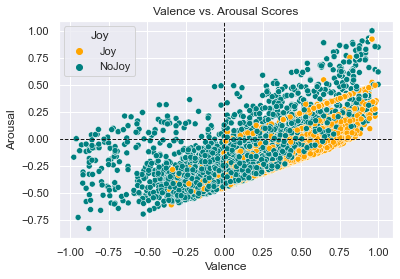

In [18]:
# Same plots as above but with rescaled values
df = df[(df.V != -1) & (df.A != -1)]
##Now make this into 4 quadrants
df['Joy'] = df['Joy'].replace(1,'Joy')
df['Joy'] = df['Joy'].replace(0,'NoJoy')
#print(df.head())
x, y = pd.Series(df["V"], name="Valence"), pd.Series(df["A"], name="Arousal")
sns.set_theme(color_codes=True)
ax = sns.scatterplot(data = df, x= "V", y="A", marker="o", hue="Joy", palette = ["orange", "teal"])
plt.axhline(y=0, color='k', linestyle='--', linewidth=1)          
plt.axvline(x=0, color='k',linestyle='--', linewidth=1)
plt.xlabel("Valence")
plt.ylabel("Arousal")
plt.title("Valence vs. Arousal Scores")

df.to_csv("Scaled-VAD.csv")

#This graph looks very positively correlated and linear --> is this factual or due to the scale?